In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [48]:
netflix_data = pd.read_csv('/Users/juliopuebla/Desktop/Shivani/netflix_titles.csv')

In [49]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [50]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [51]:
# Clean data: Remove rows with missing 'date_added', 'rating', or 'type'

netflix_data.dropna(subset=['date_added', 'rating', 'type'], inplace=True)

In [52]:
# 1. Understanding what content is available in different countries
# This shows which countries have the most titles, indicating Netflix's market focus or content availability.

print(netflix_data['country'].value_counts().head(10))

United States     2546
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64


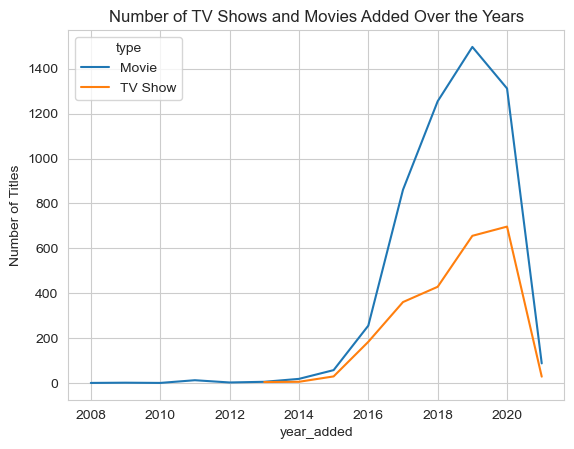

In [62]:
# 2. Netflix's focus on TV vs. Movies
# The plot shows trends in Netflix's catalog, revealing if there's a shift
# towards TV shows or movies over the years.

netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added']).dt.year
netflix_data.groupby(['year_added', 'type']).size().unstack().plot(kind='line')
plt.title('Number of TV Shows and Movies Added Over the Years')
plt.ylabel('Number of Titles')
plt.show()

It's true, Netflix has indeed been focusing more on TV shows compared to movies in the recent years, especially around and after 2018.

In [85]:
# 3. and 4. Predict the Type and Model Comparison
# Using features like 'year_added', 'rating_encoded', and 'weekday_added' to predict if a title is a TV show or movie.
# The model accuracies will show which algorithm performs best at this task.

netflix_data['weekday_added'] = pd.to_datetime(netflix_data['date_added']).dt.weekday
netflix_data['rating_encoded'] = LabelEncoder().fit_transform(netflix_data['rating'])
X = netflix_data[['year_added', 'rating_encoded', 'weekday_added']]
y = netflix_data['type']



In [68]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))



In [76]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.7153885743695316
Logistic Regression Accuracy: 0.700977869274318
KNN Accuracy: 0.680905815748842


Decision Tree Accuracy outperforms the others.

In [81]:
# Adding feature of Country to the mix
# Data Cleaning
netflix_data.dropna(subset=['date_added', 'rating', 'type', 'country'], inplace=True)

# Feature Engineering
netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added']).dt.year
netflix_data['weekday_added'] = pd.to_datetime(netflix_data['date_added']).dt.weekday
netflix_data['rating_encoded'] = LabelEncoder().fit_transform(netflix_data['rating'])

# Handling 'country' - simple approach: take the first country listed
netflix_data['primary_country'] = netflix_data['country'].apply(lambda x: x.split(',')[0])
netflix_data['country_encoded'] = LabelEncoder().fit_transform(netflix_data['primary_country'])

# Feature Selection
X = netflix_data[['year_added', 'rating_encoded', 'weekday_added', 'country_encoded']]
y = netflix_data['type']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train and Evaluate Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.7308750687947165
KNN Accuracy: 0.7649972482113374
Decision Tree Accuracy: 0.7699504678040726


Decision Tree and KKN Accuracy are performing better.

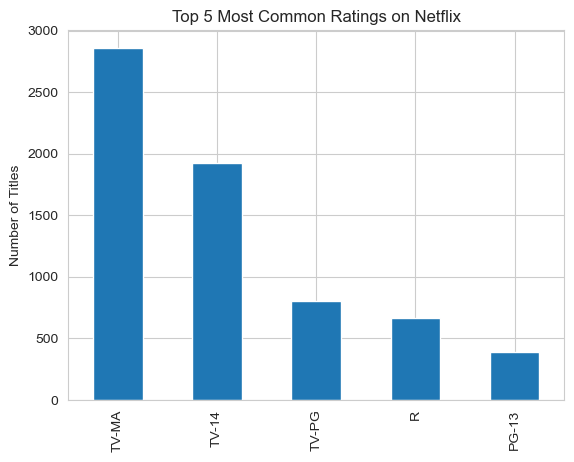

In [67]:
# 5. How can Netflix's recommendation system be improved based on what is seen?
# Analyzing the most common ratings on Netflix
common_ratings = netflix_data['rating'].value_counts().head(5)
common_ratings.plot(kind='bar')
plt.title('Top 5 Most Common Ratings on Netflix')
plt.ylabel('Number of Titles')
plt.show()

- Focus on Mature Content: Since TV-MA (Mature Audience) is the most common rating, it implies a significant portion of Netflix's audience prefers mature content. Netflix could prioritize acquiring or producing more TV-MA-rated shows and movies, as these seem to resonate with their current viewer base.

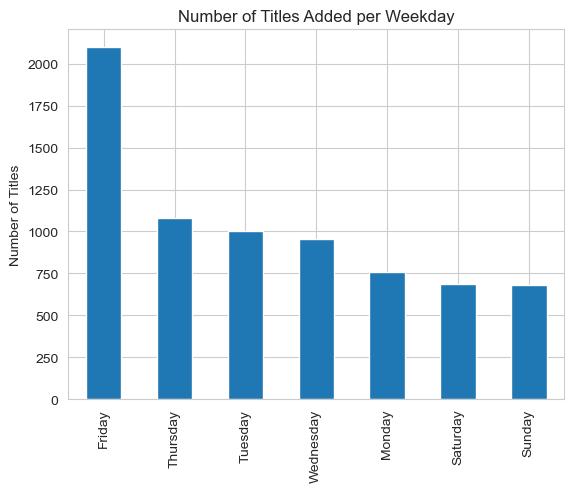

In [88]:
# Analyzing Preferred Launch Weekday
netflix_data['weekday_added'] = pd.to_datetime(netflix_data['date_added']).dt.day_name()
weekday_counts = netflix_data['weekday_added'].value_counts()
weekday_counts.plot(kind='bar')
plt.title('Number of Titles Added per Weekday')
plt.ylabel('Number of Titles')
plt.show()



- Strategic Release Timing: With Friday being the most popular day for adding new titles, it suggests that viewers might be more inclined to explore new content at the end of the week, possibly due to the weekend ahead. Netflix could leverage this insight by scheduling the release of highly anticipated titles or genres that perform well on Fridays to maximize viewership and engagement.